In [1]:
# Todays task is delete the datapoints 70 and 76. Store the new data from cars_data. Build model and find the AIC, BIC, R-squared and adjusted r-squared.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
cars_data = pd.read_csv('Cars.csv')

In [4]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [5]:
cars_data_one=cars_data.copy()

In [7]:
cars_data_one

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [8]:
import numpy as np

cars_data_one['log_HP'] = np.log(cars_data_one['HP'])
cars_data_one['log_SP'] = np.log(cars_data_one['SP'])
cars_data_one['log_VOL'] = np.log(cars_data_one['VOL'])
cars_data_one['log_WT'] = np.log(cars_data_one['WT'])

In [10]:
cars_data_one

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


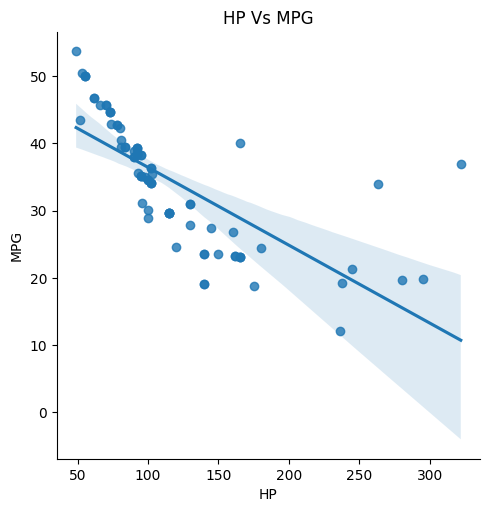

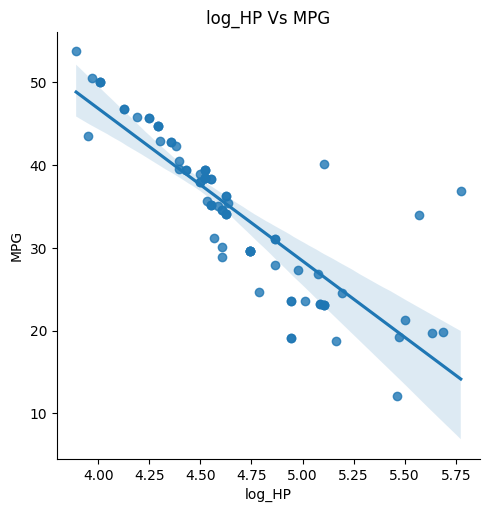

In [11]:
sns.lmplot(x='HP',y='MPG',data = cars_data_one)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_one)
plt.title('log_HP Vs MPG')
plt.show()

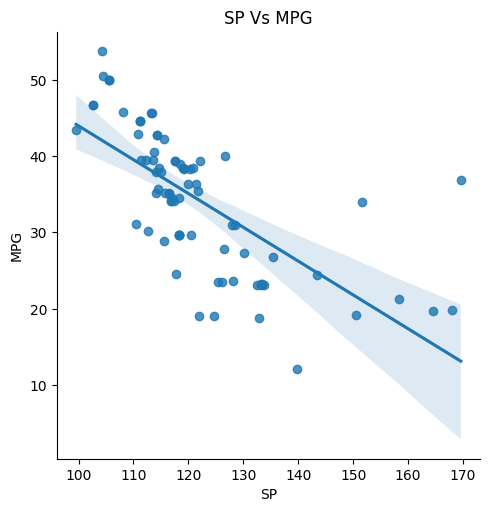

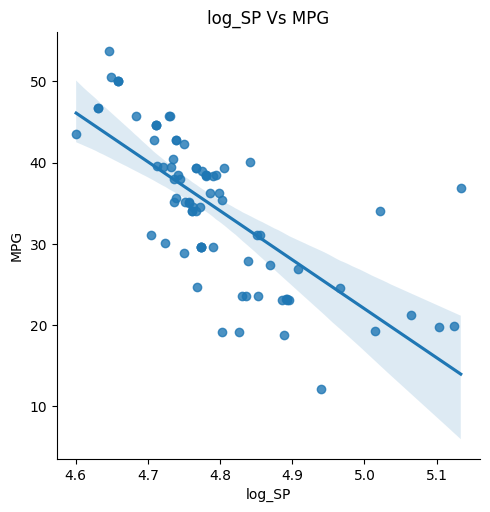

In [12]:
sns.lmplot(x='SP',y='MPG',data = cars_data_one)
plt.title('SP Vs MPG')
plt.show()

sns.lmplot(x='log_SP',y='MPG',data = cars_data_one)
plt.title('log_SP Vs MPG')
plt.show()

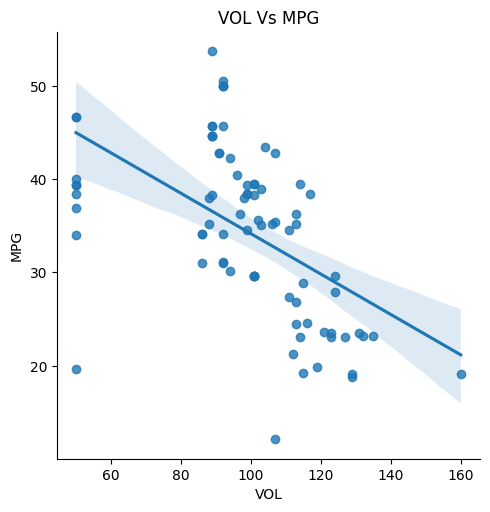

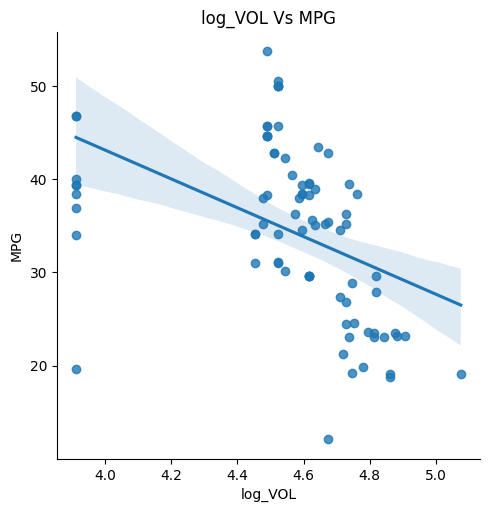

In [14]:
sns.lmplot(x='VOL',y='MPG',data = cars_data_one)
plt.title('VOL Vs MPG')
plt.show()

sns.lmplot(x='log_VOL',y='MPG',data = cars_data_one)
plt.title('log_VOL Vs MPG')
plt.show()

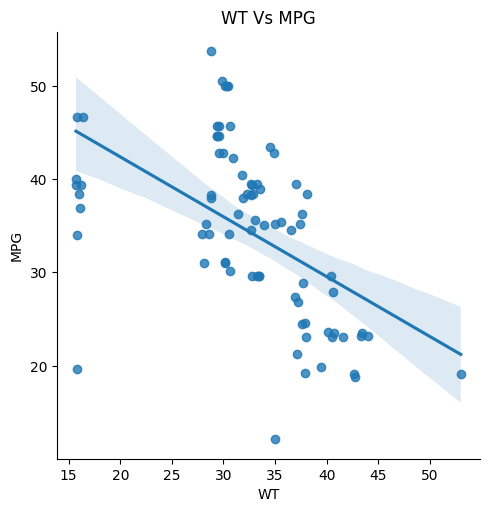

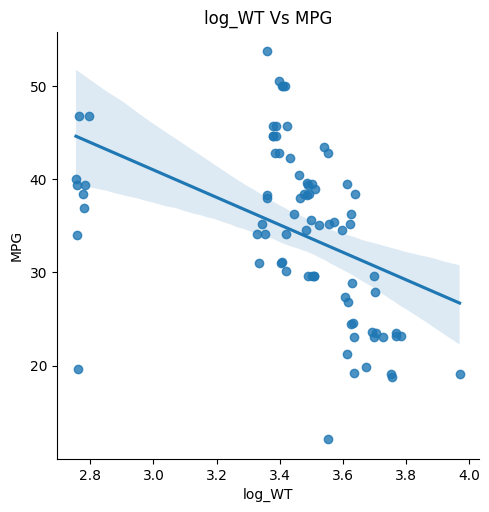

In [15]:
sns.lmplot(x='WT',y='MPG',data = cars_data_one)
plt.title('WT Vs MPG')
plt.show()

sns.lmplot(x='log_WT',y='MPG',data = cars_data_one)
plt.title('log_WT Vs MPG')
plt.show()

### Results after Optimizing Model

In [20]:
model_1 = smf.ols(formula = 'MPG~ log_HP', data = cars_data_one).fit()
print('AIC Value   :',model_1.aic)
print('BIC Value   :',model_1.bic)
print('R Squared   :',model_1.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_1.rsquared_adj.round(4))

AIC Value   : 490.4986085730722
BIC Value   : 495.28750688241706
R Squared   : 0.7114
Adj R Square: 0.7078


In [21]:
model_2 = smf.ols(formula = 'MPG~log_HP+ log_VOL', data = cars_data_one).fit()
print('AIC Value   :',model_2.aic)
print('BIC Value   :',model_2.bic)
print('R Squared   :',model_2.rsquared.round(4))
print('Adj R Square:',model_2.rsquared_adj.round(4))

AIC Value   : 444.0331139539935
BIC Value   : 451.2164614180108
R Squared   : 0.8414
Adj R Square: 0.8373


In [22]:
model_3= smf.ols(formula = 'MPG~ log_HP + log_VOL+ log_SP', data = cars_data_one).fit()
print('AIC Value   :',model_3.aic)
print('BIC Value   :',model_3.bic)
print('R Squared   :',model_3.rsquared.round(4))
print('Adj R Square:',model_3.rsquared_adj.round(4))

AIC Value   : 399.1034940191334
BIC Value   : 408.68129063782317
R Squared   : 0.9111
Adj R Square: 0.9077


In [24]:
model_4 = smf.ols(formula = 'MPG~ log_HP + log_VOL + log_SP+ log_WT', data = cars_data_one).fit()
print('AIC Value   :',model_4.aic)
print('BIC Value   :',model_4.bic)
print('R Squared   :',model_4.rsquared.round(4))
print('Adj R Square:',model_4.rsquared_adj.round(4))

AIC Value   : 400.50133505038707
BIC Value   : 412.4735808237493
R Squared   : 0.9118
Adj R Square: 0.9071


### Detecting Influencers/Outliers

In [25]:
model_influence=model_3.get_influence()

In [26]:
c,_=model_influence.cooks_distance

In [28]:
c

array([3.40987125e-03, 2.23408703e-03, 2.23408703e-03, 1.77985502e-06,
       1.79486181e-03, 7.64695598e-05, 2.23408703e-03, 3.19265706e-02,
       3.19265706e-02, 7.99487571e-05, 2.44665515e-03, 1.19735589e-01,
       2.13272656e-03, 2.44665515e-03, 1.44838258e-03, 2.44665515e-03,
       1.03203952e-04, 1.19735589e-01, 1.03203952e-04, 1.30253749e-04,
       1.41649274e-05, 6.51265138e-03, 1.29286512e-04, 1.01394529e-04,
       5.14819946e-05, 8.93020535e-02, 6.85709760e-04, 1.41649274e-05,
       5.66794132e-03, 1.50386508e-05, 6.49382140e-03, 3.54581546e-03,
       2.77708017e-04, 1.90090447e-03, 2.22732873e-03, 7.44988994e-04,
       2.47403353e-04, 4.32180481e-04, 4.32180481e-04, 1.21316892e-03,
       7.63813854e-04, 3.72410329e-04, 8.16200351e-05, 2.44091959e-05,
       6.47854742e-04, 9.73561619e-05, 5.57764358e-04, 5.99712527e-04,
       2.12897923e-03, 1.98013115e-05, 1.98013115e-05, 1.98013115e-05,
       1.08708219e-03, 1.03438056e-02, 1.08946217e-04, 9.85957728e-07,
      

<StemContainer object of 3 artists>

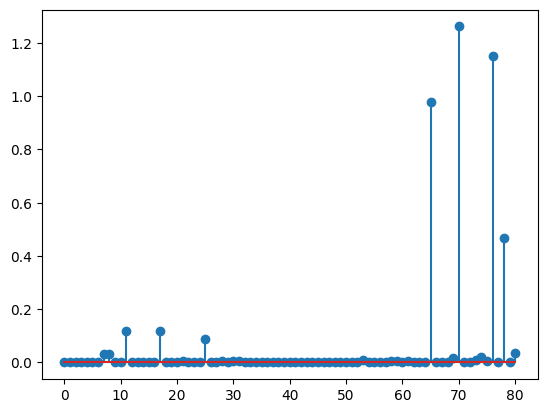

In [31]:
plt.stem(np.arange(len(cars_data_one)), np.round(c, 3))

In [32]:
np.argmax(c),np.max(c)

(70, 1.2620875804268463)

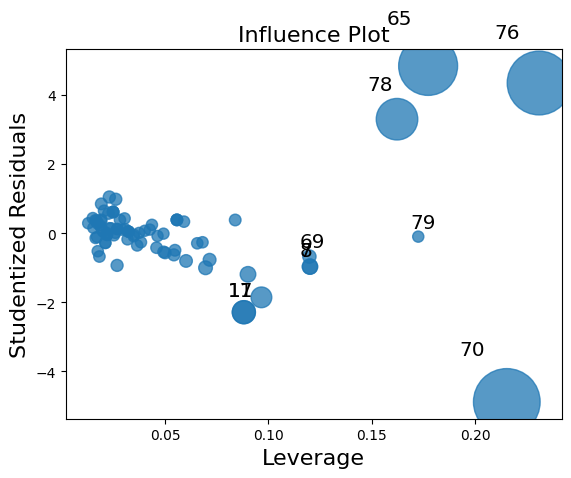

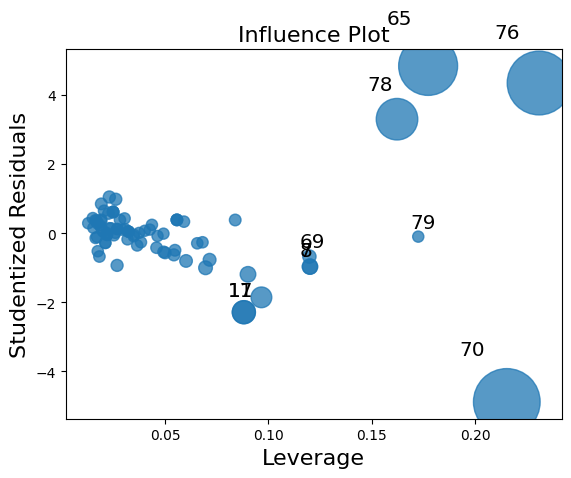

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_3)

In [130]:
cars_data_two = cars_data_one.copy()

In [131]:
cars_data_two=cars_data_two.drop(cars_data_one.index[[70,76]],axis=0)

In [156]:
cars_data_two=cars_data_two.reset_index().drop(['level_0','index'],axis=1)

In [157]:
cars_data_two.tail(11)

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
70,280,19.678507,50,164.598513,15.823060,5.634790,5.103509,3.912023,2.761468
71,162,23.203569,135,133.415985,44.013139,5.087596,4.893472,4.905275,3.784488
72,162,23.203569,132,133.140074,43.353123,5.087596,4.891402,4.882802,3.769379
73,140,19.086341,160,124.715241,52.997752,4.941642,4.826033,5.075174,3.970250
74,140,19.086341,129,121.864163,42.618698,4.941642,4.802907,4.859812,3.752293
75,175,18.762837,129,132.864163,42.778219,5.164786,4.889327,4.859812,3.756029
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


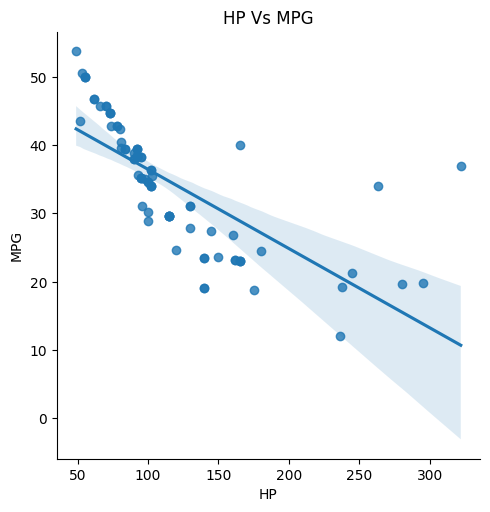

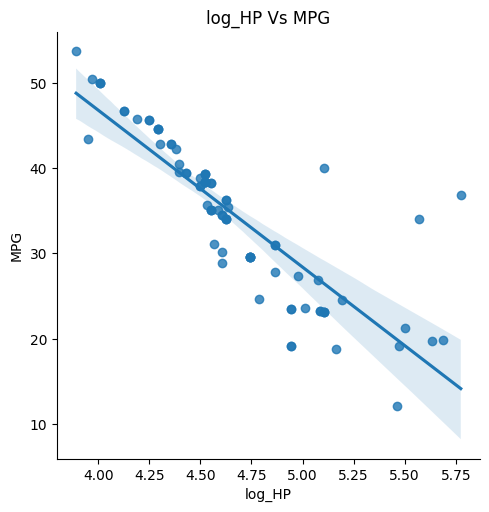

In [159]:
sns.lmplot(x='HP',y='MPG',data = cars_data_two)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_two)
plt.title('log_HP Vs MPG')
plt.show()

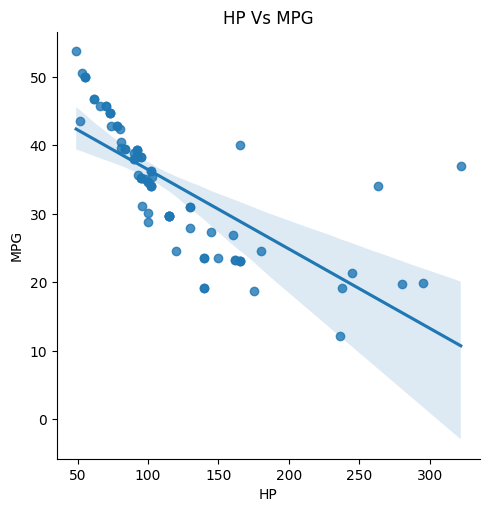

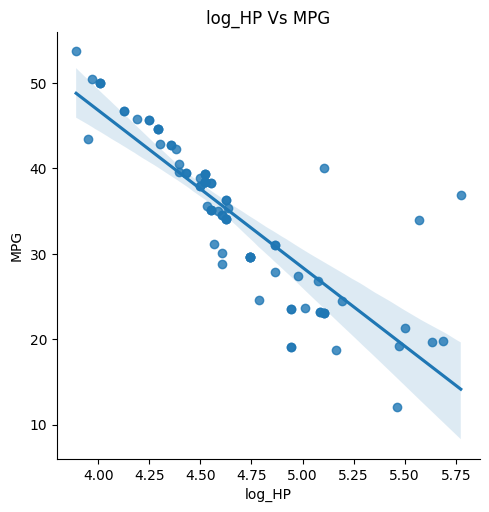

In [160]:
sns.lmplot(x='HP',y='MPG',data = cars_data_two)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_two)
plt.title('log_HP Vs MPG')
plt.show()

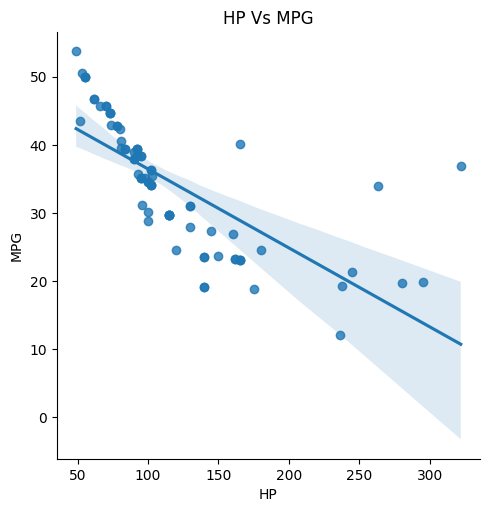

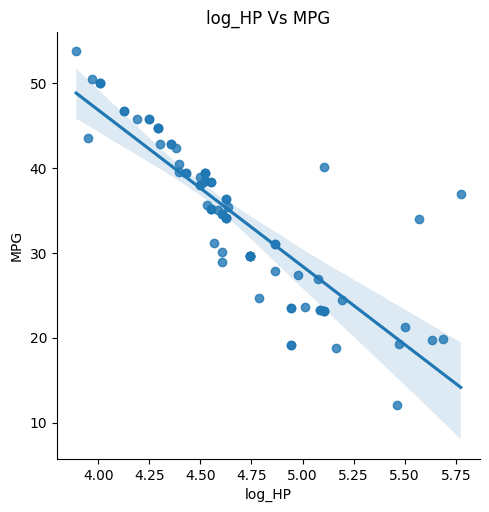

In [161]:
sns.lmplot(x='HP',y='MPG',data = cars_data_two)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_two)
plt.title('log_HP Vs MPG')
plt.show()

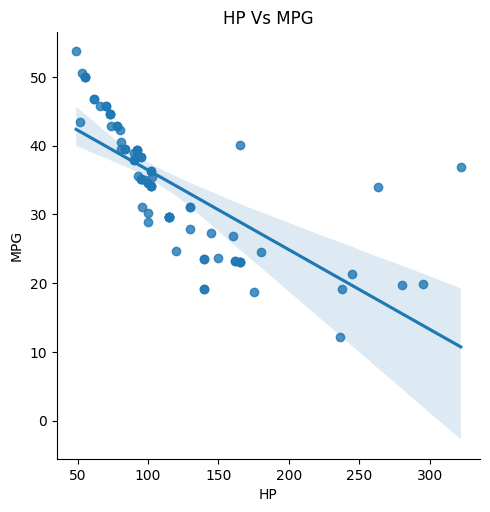

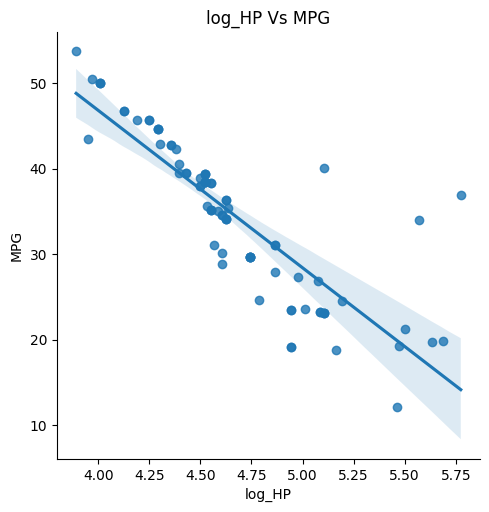

In [162]:
sns.lmplot(x='HP',y='MPG',data = cars_data_two)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_two)
plt.title('log_HP Vs MPG')
plt.show()

In [163]:
model_5 = smf.ols(formula = 'MPG~ log_HP', data = cars_data_two).fit()
print('AIC Value   :',model_5.aic)
print('BIC Value   :',model_5.bic)
print('R Squared   :',model_5.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_5.rsquared_adj.round(4))

AIC Value   : 490.4986085730722
BIC Value   : 495.28750688241706
R Squared   : 0.7114
Adj R Square: 0.7078


In [164]:
model_6 = smf.ols(formula = 'MPG~ log_HP+log_VOL', data = cars_data_two).fit()
print('AIC Value   :',model_6.aic)
print('BIC Value   :',model_6.bic)
print('R Squared   :',model_6.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_6.rsquared_adj.round(4))

AIC Value   : 444.0331139539935
BIC Value   : 451.2164614180108
R Squared   : 0.8414
Adj R Square: 0.8373


In [165]:
model_7 = smf.ols(formula = 'MPG~ log_HP+log_VOL+log_SP', data = cars_data_two).fit()
print('AIC Value   :',model_7.aic)
print('BIC Value   :',model_7.bic)
print('R Squared   :',model_7.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_7.rsquared_adj.round(4))

AIC Value   : 399.1034940191334
BIC Value   : 408.68129063782317
R Squared   : 0.9111
Adj R Square: 0.9077


In [166]:
model_8 = smf.ols(formula = 'MPG~ log_HP+log_VOL+log_SP+log_WT', data = cars_data_two).fit()
print('AIC Value   :',model_8.aic)
print('BIC Value   :',model_8.bic)
print('R Squared   :',model_8.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_8.rsquared_adj.round(4))

AIC Value   : 400.50133505038707
BIC Value   : 412.4735808237493
R Squared   : 0.9118
Adj R Square: 0.9071


In [70]:
model_influence=model_7.get_influence()

In [71]:
c1,_=model_influence.cooks_distance

In [72]:
c1

array([3.40987125e-03, 2.23408703e-03, 2.23408703e-03, 1.77985502e-06,
       1.79486181e-03, 7.64695598e-05, 2.23408703e-03, 3.19265706e-02,
       3.19265706e-02, 7.99487571e-05, 2.44665515e-03, 1.19735589e-01,
       2.13272656e-03, 2.44665515e-03, 1.44838258e-03, 2.44665515e-03,
       1.03203952e-04, 1.19735589e-01, 1.03203952e-04, 1.30253749e-04,
       1.41649274e-05, 6.51265138e-03, 1.29286512e-04, 1.01394529e-04,
       5.14819946e-05, 8.93020535e-02, 6.85709760e-04, 1.41649274e-05,
       5.66794132e-03, 1.50386508e-05, 6.49382140e-03, 3.54581546e-03,
       2.77708017e-04, 1.90090447e-03, 2.22732873e-03, 7.44988994e-04,
       2.47403353e-04, 4.32180481e-04, 4.32180481e-04, 1.21316892e-03,
       7.63813854e-04, 3.72410329e-04, 8.16200351e-05, 2.44091959e-05,
       6.47854742e-04, 9.73561619e-05, 5.57764358e-04, 5.99712527e-04,
       2.12897923e-03, 1.98013115e-05, 1.98013115e-05, 1.98013115e-05,
       1.08708219e-03, 1.03438056e-02, 1.08946217e-04, 9.85957728e-07,
      

<StemContainer object of 3 artists>

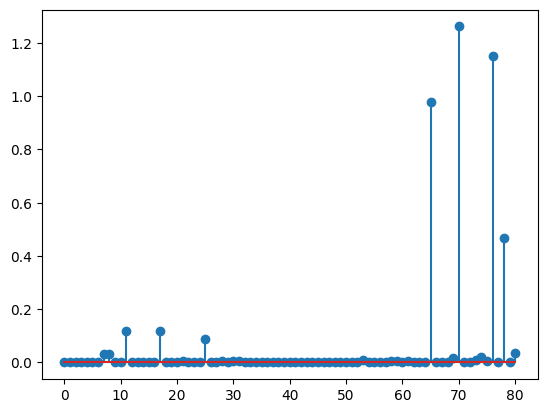

In [73]:
plt.stem(np.arange(len(cars_data_two)), np.round(c1, 3))

In [79]:
np.argmax(c1),np.max(c1)

(70, 1.2620875804268463)

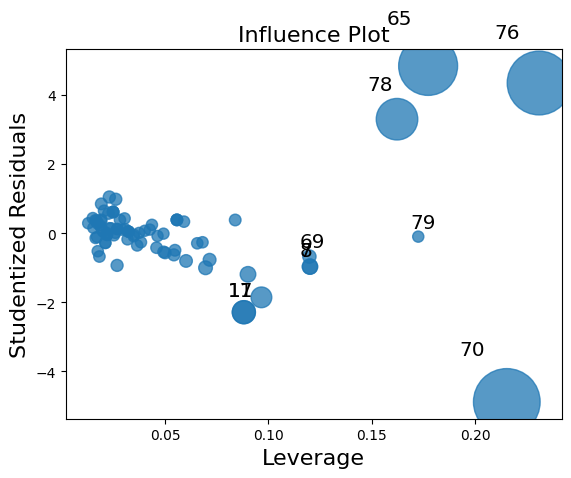

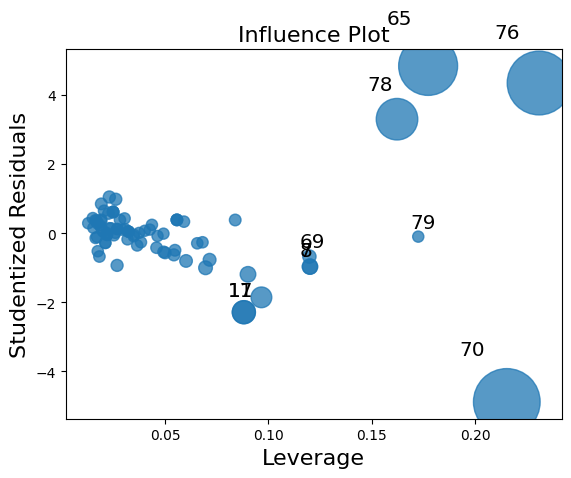

In [80]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_7)

In [81]:
cars_data_three = cars_data_two.copy()

In [82]:
cars_data_three

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


In [99]:
cars_data_three=cars_data_three.drop(cars_data_three.index[[70,65]],axis=0)

In [100]:
cars_data_three

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
69,245,21.273708,112,158.300669,37.141733,5.501258,5.064496,4.718499,3.614741
72,162,23.203569,132,133.140074,43.353123,5.087596,4.891402,4.882802,3.769379
74,140,19.086341,129,121.864163,42.618698,4.941642,4.802907,4.859812,3.752293
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864


In [101]:
cars_data_three.tail(10)

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
60,145,27.354265,111,130.208698,36.888153,4.976734,4.869139,4.709530,3.607890
61,120,24.609132,116,117.668550,37.860411,4.787492,4.767872,4.753590,3.633906
62,140,23.515917,131,126.048103,43.390988,4.941642,4.836664,4.875197,3.770252
63,140,23.515917,123,125.312342,40.722831,4.941642,4.830809,4.812184,3.706789
64,150,23.605158,121,128.128401,40.159482,5.010635,4.853033,4.795791,3.692859
69,245,21.273708,112,158.300669,37.141733,5.501258,5.064496,4.718499,3.614741
72,162,23.203569,132,133.140074,43.353123,5.087596,4.891402,4.882802,3.769379
74,140,19.086341,129,121.864163,42.618698,4.941642,4.802907,4.859812,3.752293
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


In [102]:
cars_data_three.reset_index().drop(['index'],axis=1)

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
65,245,21.273708,112,158.300669,37.141733,5.501258,5.064496,4.718499,3.614741
66,162,23.203569,132,133.140074,43.353123,5.087596,4.891402,4.882802,3.769379
67,140,19.086341,129,121.864163,42.618698,4.941642,4.802907,4.859812,3.752293
68,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864


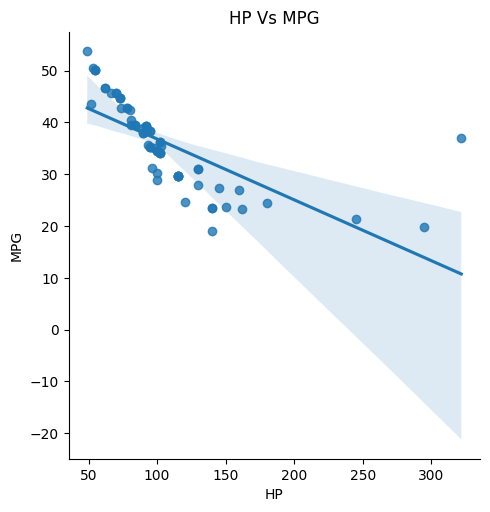

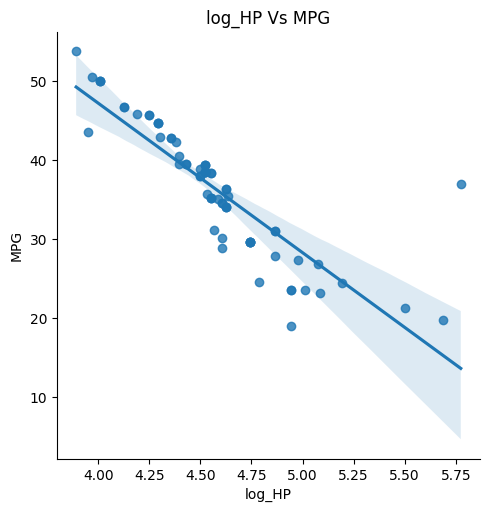

In [107]:
sns.lmplot(x='HP',y='MPG',data = cars_data_three)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_three)
plt.title('log_HP Vs MPG')
plt.show()

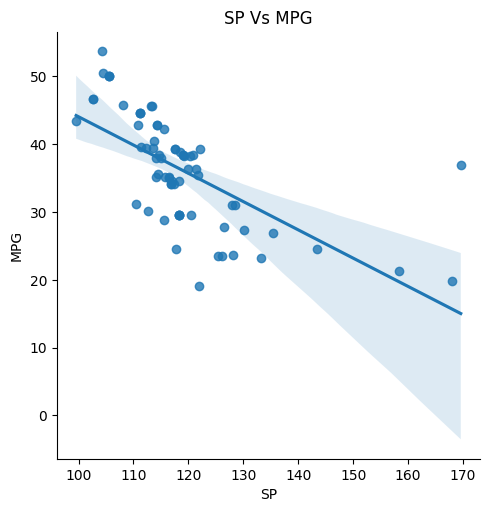

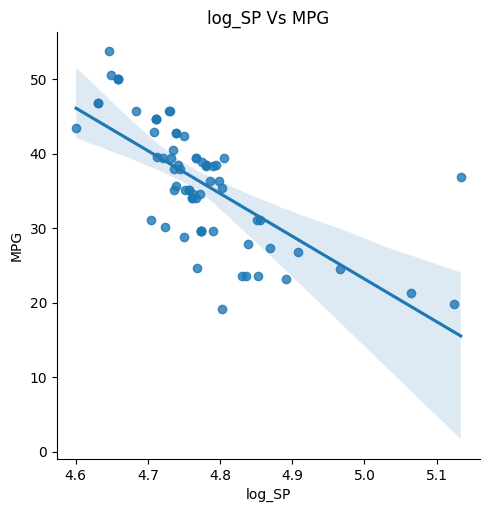

In [108]:
sns.lmplot(x='SP',y='MPG',data = cars_data_three)
plt.title('SP Vs MPG')
plt.show()

sns.lmplot(x='log_SP',y='MPG',data = cars_data_three)
plt.title('log_SP Vs MPG')
plt.show()

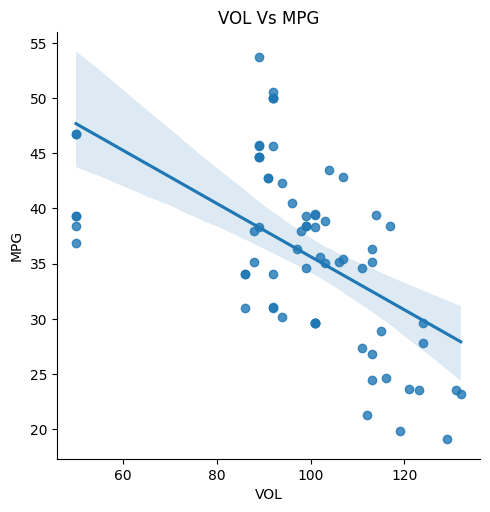

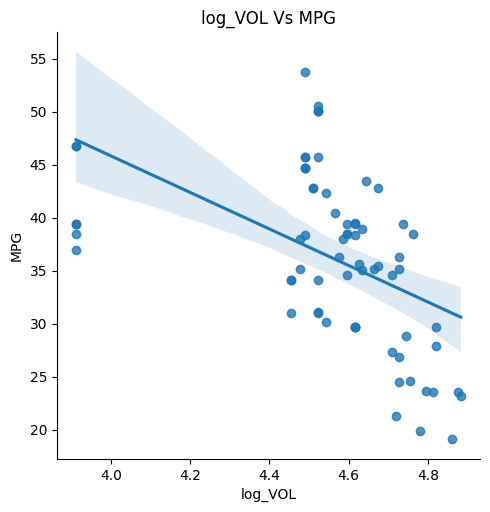

In [109]:
sns.lmplot(x='VOL',y='MPG',data = cars_data_three)
plt.title('VOL Vs MPG')
plt.show()

sns.lmplot(x='log_VOL',y='MPG',data = cars_data_three)
plt.title('log_VOL Vs MPG')
plt.show()

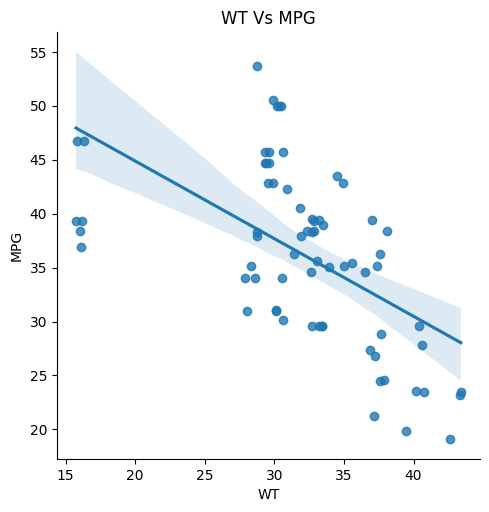

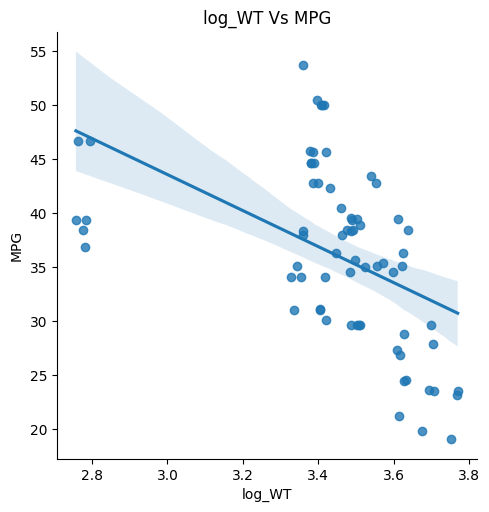

In [110]:
sns.lmplot(x='WT',y='MPG',data = cars_data_three)
plt.title('WT Vs MPG')
plt.show()

sns.lmplot(x='log_WT',y='MPG',data = cars_data_three)
plt.title('log_WT Vs MPG')
plt.show()

### Results after Optimizing Model

In [111]:
model_9 = smf.ols(formula = 'MPG~ log_HP', data = cars_data_three).fit()
print('AIC Value   :',model_9.aic)
print('BIC Value   :',model_9.bic)
print('R Squared   :',model_9.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_9.rsquared_adj.round(4))

AIC Value   : 402.1531145455294
BIC Value   : 406.6501050296281
R Squared   : 0.7301
Adj R Square: 0.7261


In [112]:
model_10 = smf.ols(formula = 'MPG~ log_HP+log_VOL', data = cars_data_three).fit()
print('AIC Value   :',model_10.aic)
print('BIC Value   :',model_10.bic)
print('R Squared   :',model_10.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_10.rsquared_adj.round(4))

AIC Value   : 378.7503649824782
BIC Value   : 385.4958507086263
R Squared   : 0.8122
Adj R Square: 0.8066


In [113]:
model_11 = smf.ols(formula = 'MPG~ log_HP+log_VOL+log_SP', data = cars_data_three).fit()
print('AIC Value   :',model_11.aic)
print('BIC Value   :',model_11.bic)
print('R Squared   :',model_11.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_11.rsquared_adj.round(4))

AIC Value   : 295.818938733632
BIC Value   : 304.81291970182946
R Squared   : 0.9442
Adj R Square: 0.9417


In [115]:
model_12 = smf.ols(formula = 'MPG~ log_HP+log_VOL+log_SP+log_WT', data = cars_data_three).fit()
print('AIC Value   :',model_12.aic)
print('BIC Value   :',model_12.bic)
print('R Squared   :',model_12.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_12.rsquared_adj.round(4))

AIC Value   : 297.78660594673323
BIC Value   : 309.02908215698005
R Squared   : 0.9442
Adj R Square: 0.9408


In [116]:
model_influence=model_7.get_influence()

In [117]:
c2,_=model_influence.cooks_distance

In [118]:
c2

array([3.40987125e-03, 2.23408703e-03, 2.23408703e-03, 1.77985502e-06,
       1.79486181e-03, 7.64695598e-05, 2.23408703e-03, 3.19265706e-02,
       3.19265706e-02, 7.99487571e-05, 2.44665515e-03, 1.19735589e-01,
       2.13272656e-03, 2.44665515e-03, 1.44838258e-03, 2.44665515e-03,
       1.03203952e-04, 1.19735589e-01, 1.03203952e-04, 1.30253749e-04,
       1.41649274e-05, 6.51265138e-03, 1.29286512e-04, 1.01394529e-04,
       5.14819946e-05, 8.93020535e-02, 6.85709760e-04, 1.41649274e-05,
       5.66794132e-03, 1.50386508e-05, 6.49382140e-03, 3.54581546e-03,
       2.77708017e-04, 1.90090447e-03, 2.22732873e-03, 7.44988994e-04,
       2.47403353e-04, 4.32180481e-04, 4.32180481e-04, 1.21316892e-03,
       7.63813854e-04, 3.72410329e-04, 8.16200351e-05, 2.44091959e-05,
       6.47854742e-04, 9.73561619e-05, 5.57764358e-04, 5.99712527e-04,
       2.12897923e-03, 1.98013115e-05, 1.98013115e-05, 1.98013115e-05,
       1.08708219e-03, 1.03438056e-02, 1.08946217e-04, 9.85957728e-07,
      

**I have evaluated four models by checking their AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), R-squared value, and adjusted R-squared value. These assessments were conducted after iteratively removing outliers from the dataset on two occasions.**

In [ ]:
#model-7
AIC Value   : 399.1034940191334
BIC Value   : 408.68129063782317
R Squared   : 0.9111
Adj R Square: 0.9077

In [ ]:
#model-11
AIC Value   : 295.818938733632
BIC Value   : 304.81291970182946
R Squared   : 0.9442
Adj R Square: 0.9417